<a href="https://colab.research.google.com/github/ryaltic/Airline-Price-Prediction/blob/main/Airline_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split

In [6]:
airline_data = pd.read_csv('https://raw.githubusercontent.com/ryaltic/Airline-Price-Prediction/refs/heads/main/airlines_flights_data.csv').drop(columns=['index']) # read in the data
print(airline_data.head()) # look at first few observations
print(airline_data.info()) # look at collumn types

    airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline

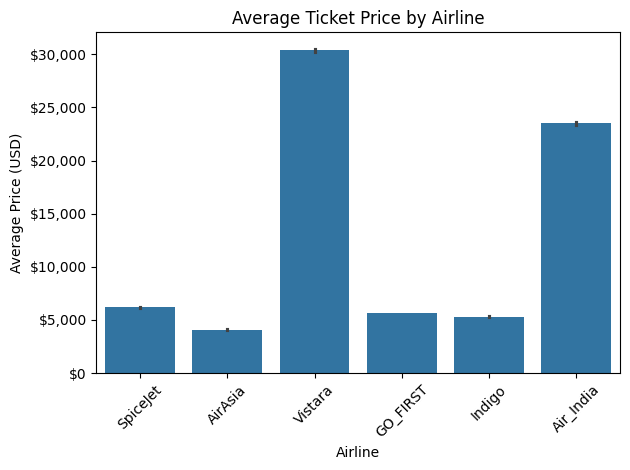

In [7]:
# Relationship between Airline and Price
sns.barplot(x='airline', y='price', data=airline_data)

plt.xlabel("Airline")
plt.ylabel("Average Price (USD)")
plt.title("Average Ticket Price by Airline")

formatter = FuncFormatter(lambda y, _: f'${y:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


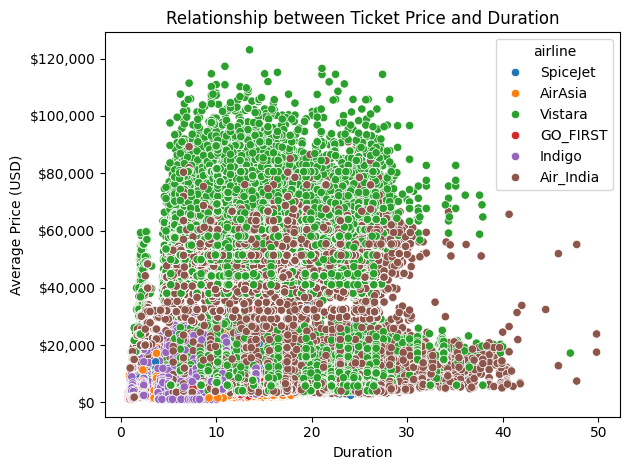

In [8]:
# Relationship between Duration and Price
sns.scatterplot(x='duration', y='price', hue = 'airline',data=airline_data)

plt.xlabel("Duration")
plt.ylabel("Average Price (USD)")
plt.title("Relationship between Ticket Price and Duration")

formatter = FuncFormatter(lambda y, _: f'${y:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


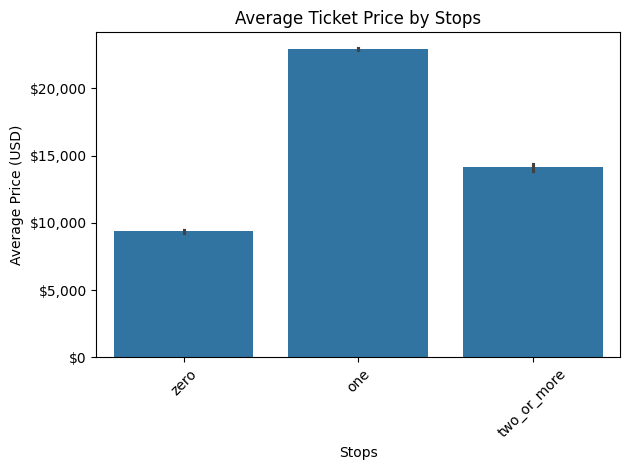

In [9]:
# Relationship between Stops and Price
sns.barplot(x='stops', y='price', data=airline_data)

plt.xlabel("Stops")
plt.ylabel("Average Price (USD)")
plt.title("Average Ticket Price by Stops")

formatter = FuncFormatter(lambda y, _: f'${y:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


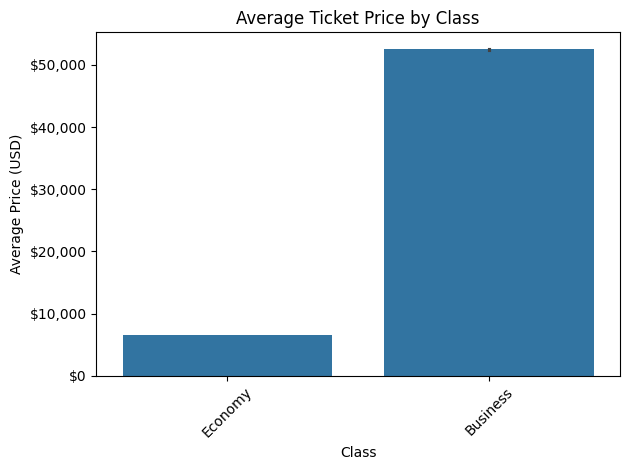

In [10]:
# Relationship between Class and Price
sns.barplot(x='class', y='price', data=airline_data)

plt.xlabel("Class")
plt.ylabel("Average Price (USD)")
plt.title("Average Ticket Price by Class")

formatter = FuncFormatter(lambda y, _: f'${y:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [11]:
print(airline_data.isna().sum()) # checking NA values

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [12]:
airline_data_factor = pd.get_dummies(airline_data, columns=['departure_time', 'stops','arrival_time','class']) # converting some character variables to factors
print(airline_data_factor.head())
print(airline_data_factor.info())

    airline   flight source_city destination_city  duration  days_left  price  \
0  SpiceJet  SG-8709       Delhi           Mumbai      2.17          1   5953   
1  SpiceJet  SG-8157       Delhi           Mumbai      2.33          1   5953   
2   AirAsia   I5-764       Delhi           Mumbai      2.17          1   5956   
3   Vistara   UK-995       Delhi           Mumbai      2.25          1   5955   
4   Vistara   UK-963       Delhi           Mumbai      2.33          1   5955   

   departure_time_Afternoon  departure_time_Early_Morning  \
0                     False                         False   
1                     False                          True   
2                     False                          True   
3                     False                         False   
4                     False                         False   

   departure_time_Evening  ...  stops_two_or_more  stops_zero  \
0                    True  ...              False        True   
1               

In [13]:
airline_data_factor.corr(numeric_only=True) # Looking at correlation among numeric predictors

,duration,days_left,price,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_one,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy
duration,1.000000,-0.039157,0.204222,-0.088588,-0.047092,0.104017,-0.045045,-0.071084,0.115464,0.400100,0.092646,-0.514861,-0.043899,0.010950,0.033094,-0.107301,0.122906,-0.064458,0.138710,-0.138710
days_left,-0.039157,1.000000,-0.091949,0.005311,0.003322,-0.010238,0.012000,-0.003206,0.004004,0.011502,-0.018624,-0.001326,-0.001289,0.020204,-0.013737,0.026500,-0.003619,-0.004593,-0.013039,0.013039
price,0.204222,-0.091949,1.000000,-0.051968,-0.012232,0.007946,-0.033768,0.018199,0.041768,0.199913,-0.064248,-0.187277,-0.040258,-0.060449,0.056408,-0.093602,0.030379,0.020344,0.937860,-0.937860
departure_time_Afternoon,-0.088588,0.005311,-0.051968,1.000000,-0.232818,-0.229031,-0.028769,-0.242565,-0.189909,0.011221,0.027777,-0.030379,-0.061514,-0.050609,0.008096,0.035518,-0.091266,0.125374,-0.045954,0.045954
departure_time_Early_Morning,-0.047092,0.003322,-0.012232,-0.232818,1.000000,-0.281550,-0.035366,-0.298188,-0.233458,-0.021642,0.029309,0.006124,0.094959,-0.008912,0.026221,-0.087950,-0.012150,-0.038415,-0.012120,0.012120
departure_time_Evening,0.104017,-0.010238,0.007946,-0.229031,-0.281550,1.000000,-0.034791,-0.293337,-0.229660,-0.022283,-0.020464,0.038363,-0.069546,0.046954,-0.073355,0.099946,0.077360,-0.016334,0.010789,-0.010789
departure_time_Late_Night,-0.045045,0.012000,-0.033768,-0.028769,-0.035366,-0.034791,1.000000,-0.036847,-0.028848,-0.033138,-0.004383,0.040559,-0.014127,0.099503,-0.028446,0.018262,0.015192,-0.032136,-0.029378,0.029378
departure_time_Morning,-0.071084,-0.003206,0.018199,-0.242565,-0.298188,-0.293337,-0.036847,1.000000,-0.243232,0.023501,0.029740,-0.045624,0.037256,-0.070994,0.102113,-0.071652,-0.103299,0.033736,0.002801,-0.002801
departure_time_Night,0.115464,0.004004,0.041768,-0.189909,-0.233458,-0.229660,-0.028848,-0.243232,1.000000,0.017095,-0.071687,0.025889,-0.008843,0.072332,-0.068714,0.031818,0.135017,-0.096555,0.049516,-0.049516
stops_one,0.400100,0.011502,0.199913,0.011221,-0.021642,-0.022283,-0.033138,0.023501,0.017095,1.000000,-0.485507,-0.832894,-0.004184,-0.016104,0.053385,-0.023020,-0.031117,-0.002148,0.119761,-0.119761


In [16]:
x = airline_data_factor.drop(columns=['price'])
y = airline_data_factor['price']
train_x, train_y, test_x, test_y = train_test_split(x,y, test_size=0.2, random_state=123)

In [15]:
#Models
#*XGboost
#*LightGBM
#*Random Forest
#*CatBoost

# Five Fold CV